In [1]:
import pickle 
import pandas as pd
import pyLDAvis.gensim
from gensim import corpora
import gensim

# Load Topic Models and Visualizations and DF
with open('topic_model.pkl', 'rb') as f:
    model = pickle.load(f)
    
with open('topic_model_vis.pkl', 'rb') as f:
    display = pickle.load(f)
    
with open('DataFrame.pkl', 'rb') as f:
    df = pickle.load(f)
    
    

/home/zeke/Desktop/TopicModelingProject/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
new_df = pd.DataFrame(df['topics'].tolist())
new_df = pd.concat([ df, new_df], axis = 1)
new_df = new_df.fillna(0)

In [3]:
pyLDAvis.display(display)

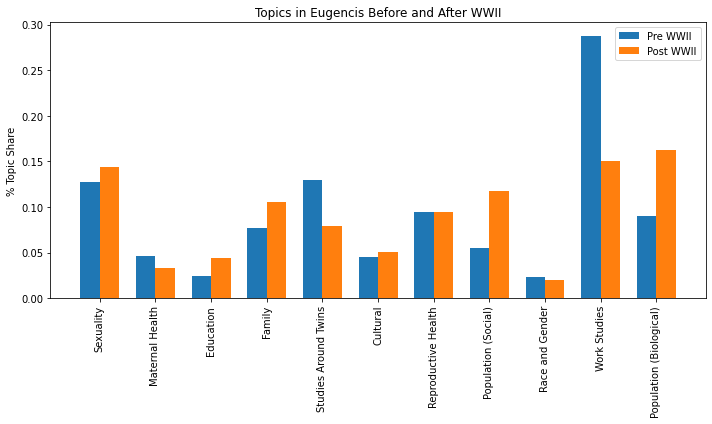

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

num_topics = 11
def get_sums(df):
    topic_sums = []
    for i in range(num_topics):
        topic_sums.append(df[i].sum())
        
    return topic_sums

labels = ["Sexuality", "Maternal Health", "Education", "Family",
          "Studies Around Twins", "Cultural", "Reproductive Health",  "Population (Social)",
          "Race and Gender", "Work Studies", "Population (Biological)"]
preWW2 = get_sums(new_df[(new_df['year'] <= 1945)])
preWW2 = [x / sum(preWW2) for x in preWW2]

postWW2 = get_sums(new_df[(new_df['year'] > 1945)])
postWW2 = [x / sum(postWW2) for x in postWW2]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, preWW2, width, label='Pre WWII')
rects2 = ax.bar(x + width/2, postWW2, width, label='Post WWII')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Topic Share')
ax.set_title('Topics in Eugencis Before and After WWII')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()


fig.tight_layout()

plt.show()

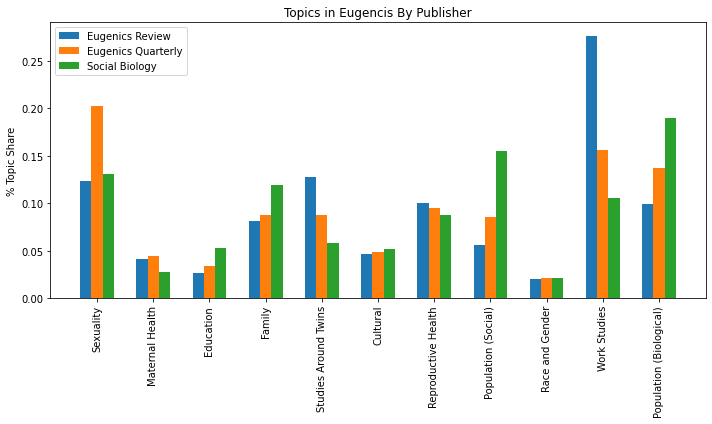

In [6]:
num_topics = 11
def get_sums(df):
    topic_sums = []
    for i in range(num_topics):
        topic_sums.append(df[i].sum())
        
    return topic_sums

labels = ["Sexuality", "Maternal Health", "Education", "Family",
          "Studies Around Twins", "Cultural", "Reproductive Health",  "Population (Social)",
          "Race and Gender", "Work Studies", "Population (Biological)"]
erev = get_sums(new_df[(new_df['publisher'] == 'ereview')])
erev = [x / sum(erev) for x in erev]

equar = get_sums(new_df[(new_df['publisher'] == 'Eugenics Quarterly')])
equar = [x / sum(equar) for x in equar]

socbio = get_sums(new_df[(new_df['publisher'] == 'Social Biology')])
socbio = [x / sum(socbio) for x in socbio]


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, erev, width, label='Eugenics Review')
rects2 = ax.bar(x , equar, width, label='Eugenics Quarterly')
rects3 = ax.bar(x + width, socbio, width, label='Social Biology')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Topic Share')
ax.set_title('Topics in Eugencis By Publisher')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.legend()


fig.tight_layout()

plt.show()

## Model Evaluation

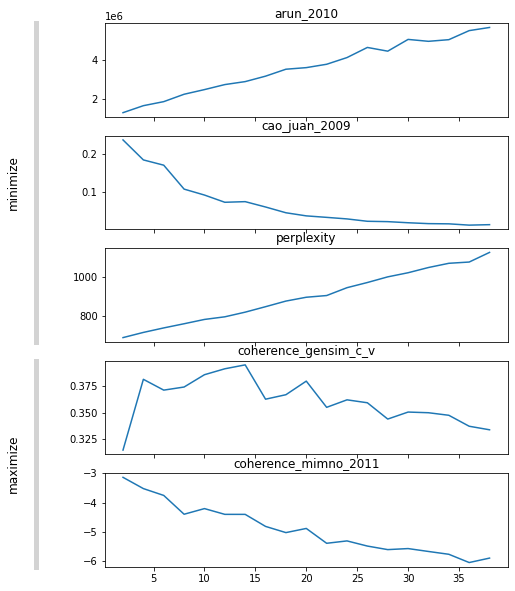

In [6]:
import pyLDAvis.sklearn
from tmtoolkit.topicmod.evaluate import results_by_parameter
from tmtoolkit.topicmod.visualize import plot_eval_results



with open('tmtk_eval_results2.pkl', 'rb') as f:
        results = pickle.load(f)

eval_results_by_topics = results_by_parameter(results, 'num_topics')
_ = plot_eval_results(eval_results_by_topics)

## Word Cloud Visualizations

Wordcloud for topic: Sexuality (Topic Number: 1)


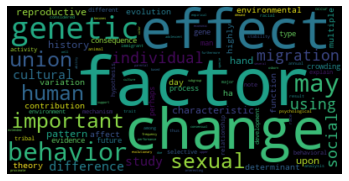

Wordcloud for topic: Maternal Health (Topic Number: 2)


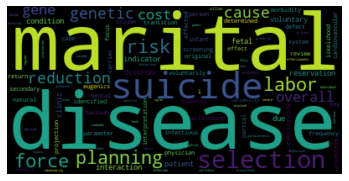

Wordcloud for topic: Education (Topic Number: 3)


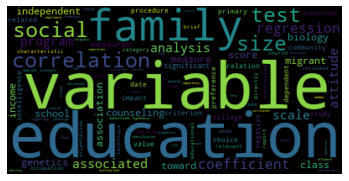

Wordcloud for topic: Family (Topic Number: 4)


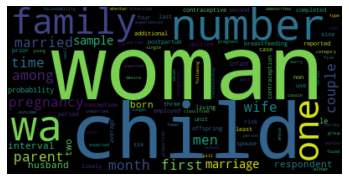

Wordcloud for topic: Studies Around Twins (Topic Number: 5)


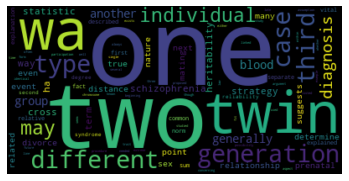

Wordcloud for topic: Cultural (Topic Number: 6)


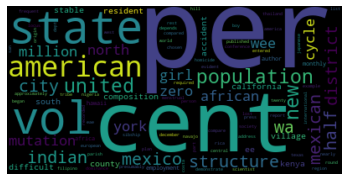

Wordcloud for topic: Reproductive Health (Topic Number: 7)


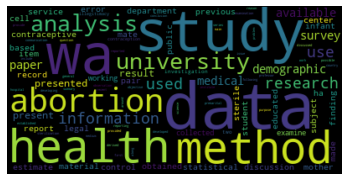

Wordcloud for topic: Population (Social) (Topic Number: 8)


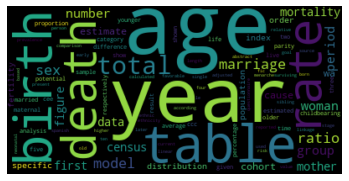

Wordcloud for topic: Race and Gender (Topic Number: 9)


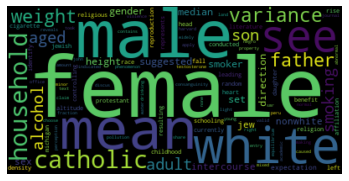

Wordcloud for topic: Work Studies (Topic Number: 10)


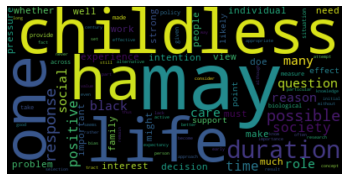

Wordcloud for topic: Population (Biological) (Topic Number: 11)


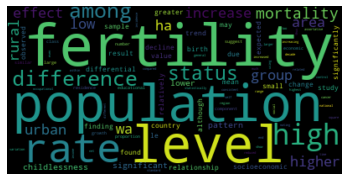

In [7]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from math import log

num_topics=11
def get_sums(df):
    topic_sums = []
    for i in range(num_topics):
        topic_sums.append(df[i].sum())
        
    return topic_sums

def get_word_cloud():
    topics = model.print_topics(num_words=100)
    for topic in topics:
        topic_dict = {}
        for word in topic[1].split('+'):
            word = word.split('*')
            freq = float(word[0].strip()) * 1000
            word = word[1].strip().strip('"')
            topic_dict[word] = int(log(freq,2))
        text = " ".join([(k + " ")*v for k,v in topic_dict.items()])
        wordcloud = WordCloud(collocations = False).generate(text)

        yield wordcloud


wordclouds = list(get_word_cloud())
for i in range(num_topics):
    print("Wordcloud for topic: {} (Topic Number: {})".format(labels[i], i+1))
    _ = plt.imshow(wordclouds[i], interpolation='bilinear')
    _ = plt.axis("off")
    _ = plt.show()




<IPython.core.display.Javascript object>


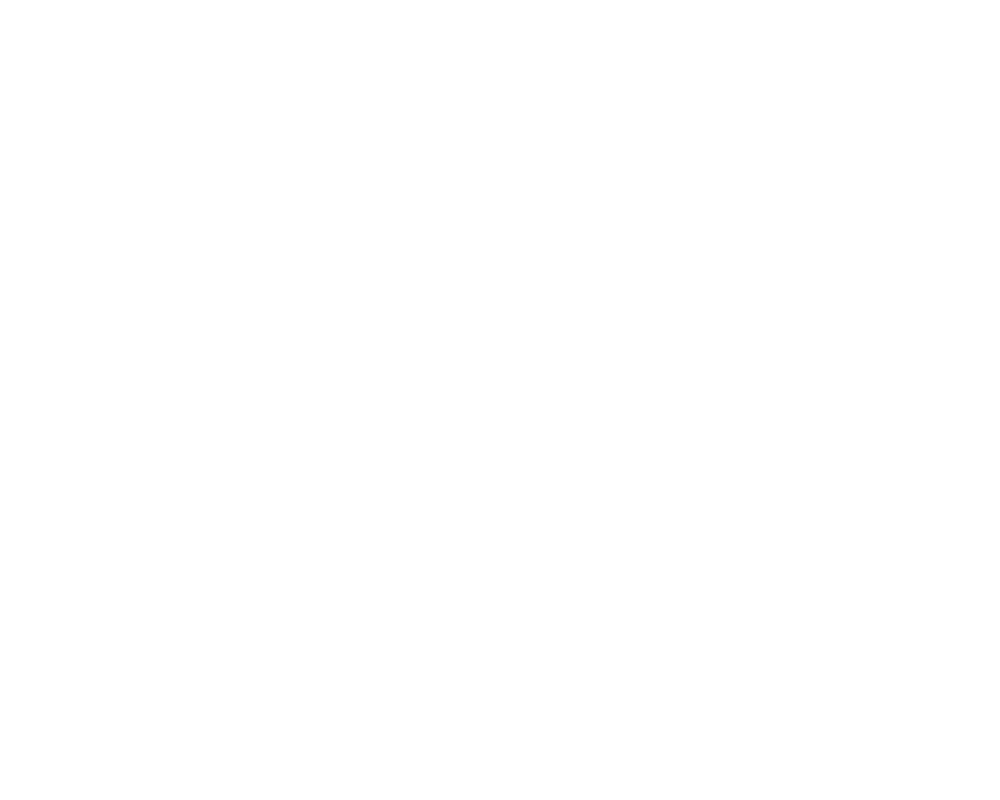

[]

In [8]:
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib notebook

num_topics = 11
def get_sums(df):
    topic_sums = []
    for i in range(num_topics):
        topic_sums.append(df[i].sum())
        
    return topic_sums

labels = ["Sexuality", "Maternal Health", "Education", "Family",
          "Studies Around Twins", "Cultural", "Reproductive Health",  "Population (Social)",
          "Race and Gender", "Work Studies", "Population (Biological)"]


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% Topic Share')
ax.set_title('Topics in Eugencis')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

def animate(i):
    ax.clear()
    ax.set_ylabel('Topics')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation=90)
    data = get_sums(new_df[(new_df['year'] <= 1910 + i)])
    data = [x / sum(data) for x in data]
    ax.set_title('Topics in Eugencis for years up to {}'.format(1910 + i))
    rects1 = ax.bar(x, data, width, color = 'blue')
    
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=90, repeat=True)
plt.gcf().subplots_adjust(bottom=0.25)

plt.plot()

<IPython.core.display.Javascript object>


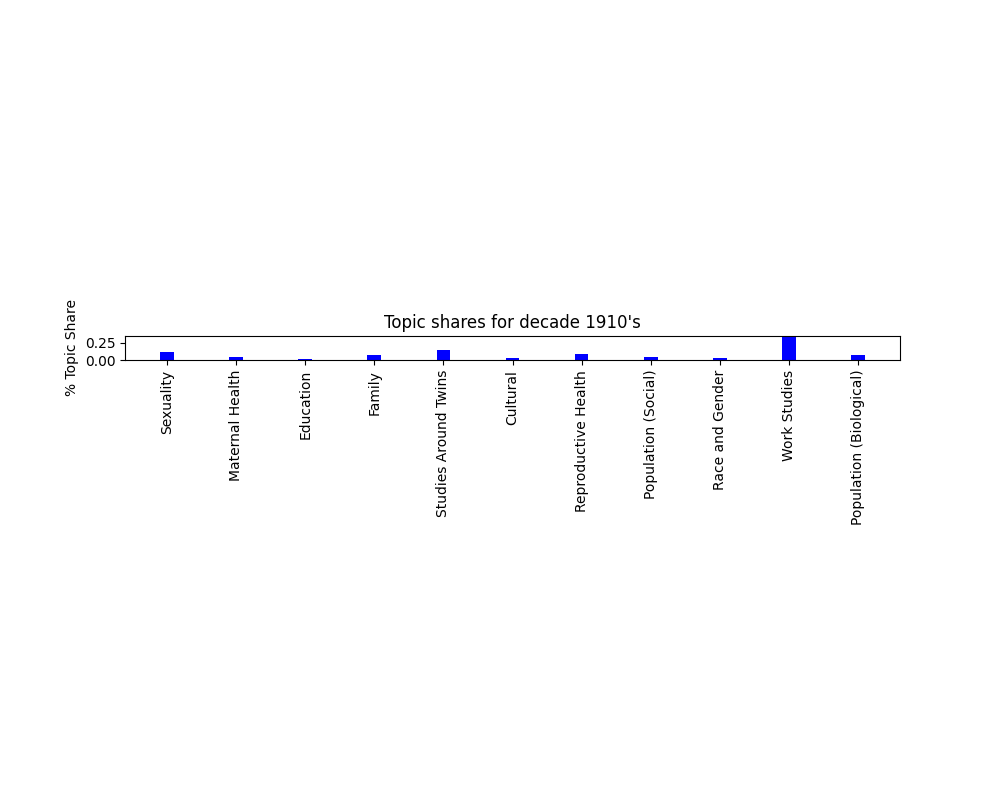

[]

In [9]:
from matplotlib import animation, rc
from IPython.display import HTML

%matplotlib notebook

num_topics = 11
def get_sums(df):
    topic_sums = []
    for i in range(num_topics):
        topic_sums.append(df[i].sum())
        
    return topic_sums

labels = ["Sexuality", "Maternal Health", "Education", "Family",
          "Studies Around Twins", "Cultural", "Reproductive Health",  "Population (Social)",
          "Race and Gender", "Work Studies", "Population (Biological)"]
erev = get_sums(new_df[(new_df['publisher'] == 'ereview')])
# erev = [x / sum(erev) for x in erev]

equar = get_sums(new_df[(new_df['publisher'] == 'Eugenics Quarterly')])
# equar = [x / sum(equar) for x in equar]

socbio = get_sums(new_df[(new_df['publisher'] == 'Social Biology')])
# socbio = [x / sum(socbio) for x in socbio]


x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Topics')
ax.set_title('Topics in Eugencis')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)

def animate(i):
    if (i % 10) == 0:
        ax.clear()
        ax.set_ylabel('% Topic Share')
        ax.set_xticks(x)
        ax.set_xticklabels(labels, rotation=90)
        ax.set_title("Topic shares for decade {}'s".format(1910 + i))
        data = get_sums(new_df[(new_df['year'] >= 1910 + i) & (new_df['year'] < 1920 + i)])
        data = [x / sum(data) for x in data]
        rects1 = ax.bar(x, data, width, color = 'blue')
    
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=90, repeat=True)

plt.gcf().subplots_adjust(bottom=0.25)
plt.plot()